# USING LTE TO CALCULATE X_H2_BAR, X_CO_BAR, l_CO_BAR
# l_CO_BAR IS CALCULATED FOR 2 REGIMES: 
#     (1) USING VELOCITY DISPERSION $\Delta v$ FROM THE SIMULATION
#     (2) USING THE $CO$ ISOTHERMAL SOUND SPEED $c_{s, CO}$

In [35]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import (center_and_r_vir, remove_bulk_velocity,
                                read_unit_from_info)
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

In [37]:
run = "hydro_59"
out = "output_00050"
path = "bulk1/data_2/" + run + "/output/"
data = pynbody.load(path + out)
aexp = data.properties['a']
data.physical_units()

r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir

sph_5 = pynbody.filt.Sphere(radius='%f kpc' % r_e)
region = data[sph_5]

omega_b, unit_l, unit_d, unit_t = read_unit_from_info(data)

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))


In [31]:
# declaring constants
m_p = pynbody.array.SimArray(1.672621e-24, "g")
G = pynbody.array.SimArray(6.6732e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b = pynbody.array.SimArray(1.380622e-16, "g cm**2 s**-2 K**-1")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.380622e-16, "erg K**-1")
c_cgs = pynbody.array.SimArray(2.9979245e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.135667e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6735575e-24, 'g')  # hydrogen mass
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
L_sun = pynbody.array.SimArray(3.839e33, "erg s**-1")
M_sun = pynbody.array.SimArray(2e33, "g")
nu = pynbody.array.SimArray(1.152712018e11, "s**-1")
A_10 = pynbody.array.SimArray(7.203e-08, "s**-1")
energy_to_temperature_units = pynbody.array.SimArray( 1e-5*((3.24078e-19)**2)*(c_cgs/nu)**3/\
                                                     (2*K_b_erg), "K km s**-1 pc**2 cm**-3 erg**-1")

In [5]:
X_H2_bar = pynbody.array.SimArray(np.load('outputs/debug_1.5/X_H2_bar_' + run + '_' + out + '.npy'),\
                                  "1")
X_CO_bar = pynbody.array.SimArray(np.load('outputs/debug_1.5/X_CO_bar_' + run + '_' + out + '.npy'),\
                                  "1")
mach_no_arr = np.load('outputs/debug_1.5/mach_no_arr_' + run + '_' + out + '.npy')
n_H_mean_arr = pynbody.array.SimArray(np.load('outputs/debug_1.5/n_H_mean_arr_' + run + '_' + out + '.npy'),\
                                      "cm**-3")
metal_arr = np.load('outputs/debug_1.5/metal_arr_' + run + '_' + out + '.npy')
temperature = np.load('outputs/debug_1.5/T_' + run + '_' + out + '.npy')
l_CO_bar_1 = pynbody.array.SimArray(np.load('outputs/debug_1.5/l_CO_bar_1' + run + '_' + out + '.npy'),\
                                    "erg s**-1 cm**-3")
l_CO_SI_bar_1 = pynbody.array.SimArray(np.load('outputs/debug_1.5/l_CO_SI_bar_1' + run + '_' + out + '.npy'),\
                                    "K km s**-1 pc**2 cm**-3")
l_CO_bar_2 = np.load('outputs/debug_1.5/l_CO_bar_2' + run + '_' + out + '.npy')
l_CO_SI_bar_2 = np.load('outputs/debug_1.5/l_CO_SI_bar_2' + run + '_' + out + '.npy')
m_H2_bar = pynbody.array.SimArray(np.load('outputs/debug_1.5/m_H2_bar_' + run + '_' + out + '.npy'),\
                                  "g")
mass = np.load('outputs/debug_1.5/mass_' + run + '_' + out + '.npy')
cell_width_arr = region.gas["smooth"].in_units('cm')
n_H2_mean = pynbody.array.SimArray(X_H2_bar * n_H_mean_arr, "cm**-3")

In [6]:
min_H = np.min(X_H2_bar)
max_H = np.max(X_H2_bar)
min_C = np.min(X_CO_bar)
max_C = np.max(X_CO_bar)
min_n = np.log10(np.min(n_H_mean_arr))
max_n = np.log10(np.max(n_H_mean_arr))
min_M = np.min(mach_no_arr)
max_M = np.max(mach_no_arr)
min_Z = np.min(metal_arr)
max_Z = np.max(metal_arr)
region.gas["X_H2_bar"] = X_H2_bar
region.gas["X_CO_bar"] = X_CO_bar
region.gas["n_H_mean_arr"] = n_H_mean_arr
region.gas["mach_no_arr"] = mach_no_arr
region.gas["metal_arr"] = metal_arr
region.gas["l_CO_bar_1"] = l_CO_bar_1
region.gas["l_CO_SI_bar_1"] = l_CO_SI_bar_1
region.gas["m_H2_bar"] = m_H2_bar
rho = region.gas["rho"].in_units('g cm**-3')

In [7]:
region.gas["rho"]

SimArray([10248.69021465, 11031.35866018, 11784.1242841 , ...,
          50644.50362705, 31841.2087888 , 40684.35762029], 'Msol kpc**-3')

In [8]:
rho

SimArray([6.93797800e-28, 7.46781512e-28, 7.97740915e-28, ...,
          3.42844251e-27, 2.15553014e-27, 2.75417807e-27], 'g cm**-3')

In [9]:
n_H_mean_arr

SimArray([0.0004148 , 0.00044647, 0.00047694, ..., 0.00204974, 0.00128871,
          0.00164662], 'cm**-3')

In [10]:
rho_sol = region.gas["rho"].in_units("Msol cm**-3")

In [32]:
hey = eV_to_ergs*h_ev*nu*1e-4*0.43479505590767203*A_10
hey

SimArray(2.39208001e-27, 'erg s**-1')

In [33]:
hey_SI = hey * energy_to_temperature_units
hey_SI

SimArray(1.60055141e-55, 'pc**2 K km s**-2 cm**-3')

In [81]:
g = region.gas["mass"].sum()
g

SimArray(1.29641992e+10, 'Msol')

In [78]:
st = region.stars["mass"].sum()

In [79]:
g/(g+st)

SimArray(0.41538634, '1.00e+00')

LTE + Log-normal PDF

In [11]:
M_H2 = np.sum(m_H2_bar)/M_sun
print M_H2/1e9

2.8471647994275058


In [13]:
#using velocity dispersion from sim
L_CO_SI_1 = np.sum(l_CO_SI_bar_1*(cell_width_arr**3))
print L_CO_SI_1/1e8

19.4797439169398


In [14]:
#using isothermal sound speed
L_CO_SI_2 = np.sum(l_CO_SI_bar_2*(cell_width_arr**3))
print L_CO_SI_2/1e8

0.7345739542543737


In [15]:
#using velocity dispersion from sim
CO_alpha_1 = L_CO_SI_1/M_H2
print CO_alpha_1

0.6841804141740124


In [16]:
#using isothermal sound speed
CO_alpha_2 = L_CO_SI_2/M_H2
print CO_alpha_2

0.025800190926850392


In [17]:
convert_factor = (((c_cgs/1.15e11)**3)*1e-5*((3.24078e-19)**2))/(2*K_b_erg)

alpha_1 = l_CO_bar_1/(rho_sol) #[erg s-1 M_sol-1]
alpha_2 = l_CO_bar_2/(rho_sol) #[erg s-1 M_sol-1]

alpha_1_SI = pynbody.array.SimArray(alpha_1 * convert_factor, "K km s**-1 pc**2 Msol**-1")
alpha_2_SI = pynbody.array.SimArray(alpha_2 * convert_factor, "K km s**-1 pc**2 Msol**-1")

In [18]:
yoo = rho_sol*M_sun
yoo

SimArray([6.97662852e-28, 7.50941729e-28, 8.02185020e-28, ...,
          3.44754189e-27, 2.16753830e-27, 2.76952122e-27], 'Msol g cm**-3')

In [19]:
rho

SimArray([6.93797800e-28, 7.46781512e-28, 7.97740915e-28, ...,
          3.42844251e-27, 2.15553014e-27, 2.75417807e-27], 'g cm**-3')

In [20]:
region.gas["alpha_1_SI"] = alpha_1_SI

In [21]:
region.gas["rho_sol"] = rho_sol

In [22]:
region.gas["alpha_1"] = alpha_1

/net/cephfs/home/mkrets/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/net/cephfs/home/mkrets/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/net/cephfs/home/mkrets/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/net/cephfs/home/mkrets/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


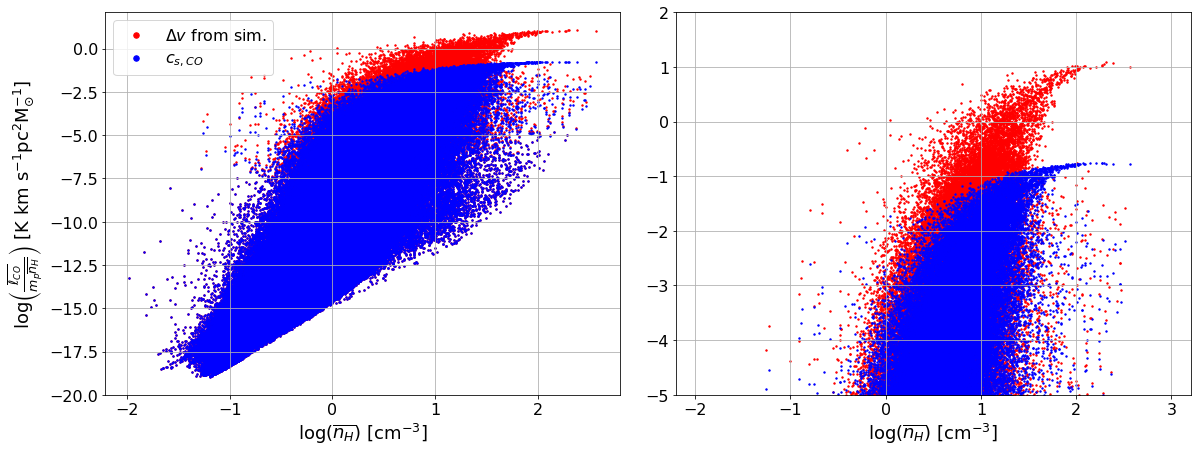

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
ax1.scatter(np.log10(n_H_mean_arr), np.log10(alpha_1_SI), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax1.scatter(np.log10(n_H_mean_arr), np.log10(alpha_2_SI), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(alpha_1_SI), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(alpha_2_SI), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax1.set_xlabel(r'$\log(\overline{n_H}) \ [\rm{cm^{-3}}]$')
ax1.set_ylabel(r'$\log\left(\frac{\overline{\ell_{CO}}}{m_p \overline{n_H}}\right) \ [\rm{K\ km\ s^{-1} pc^{2} M_{\odot}^{-1}}] $')
ax2.set_xlabel(r'$\log(\overline{n_H}) \ [\rm{cm^{-3}}]$')
# ax2.set_ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax1.grid(b=True, which='both', axis='both') 
ax2.grid(b=True, which='both', axis='both')
ax2.set_xlim([-2.2,3.2])
ax2.set_ylim([-5, +2])
# plt.setp(ax2.get_yticklabels(), visible=True)
legend = ax1.legend(loc="upper left")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
# plt.subplots_adjust(wspace=0.18)
# fig.suptitle("LTE + Log-normal PDF", fontsize=20)
# fig.subplots_adjust(top=0.88)
plt.savefig('outputs/for_thesis/log(n_H_mean)vslog(l_CO)-sim.png', 
            dpi=300, bbox_inches='tight')

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


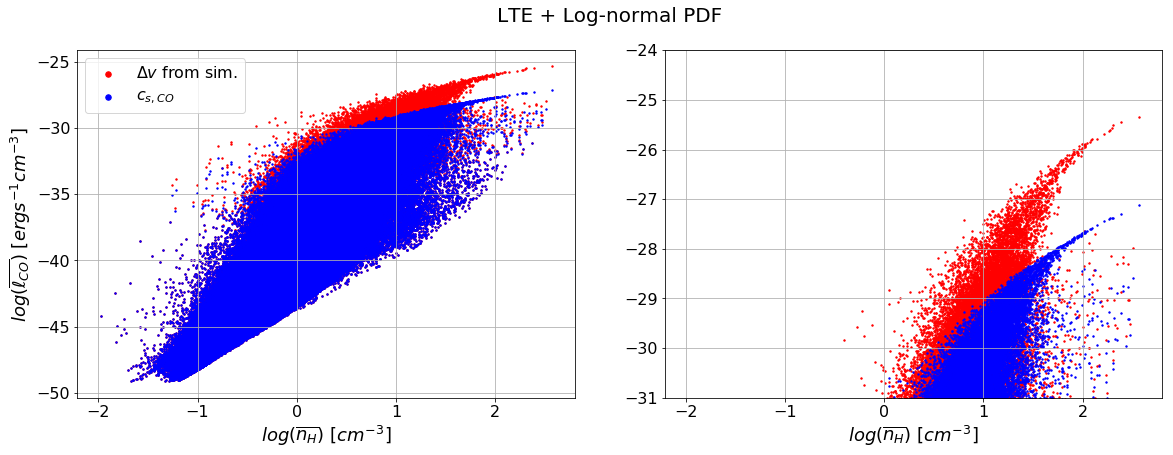

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
ax1.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar_1), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax1.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar_2), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar_1), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar_2), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax1.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
ax1.set_ylabel('$log(\overline{\ell_{CO}}) \ [erg s^{-1} cm^{-3}]$')
ax2.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
# ax2.set_ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax1.grid(b=True, which='both', axis='both') 
ax2.grid(b=True, which='both', axis='both')
# ax2.set_xlim([1.20,2.75])
ax2.set_ylim([-31, -24])
# plt.setp(ax2.get_yticklabels(), visible=True)
legend = ax1.legend(loc="upper left")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
plt.subplots_adjust(wspace=0.18)
fig.suptitle("LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
# plt.savefig('outputs/debug_1.5/log(n_H_mean)vslog(l_CO)-sim.png', 
#             dpi=300, bbox_inches='tight')

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


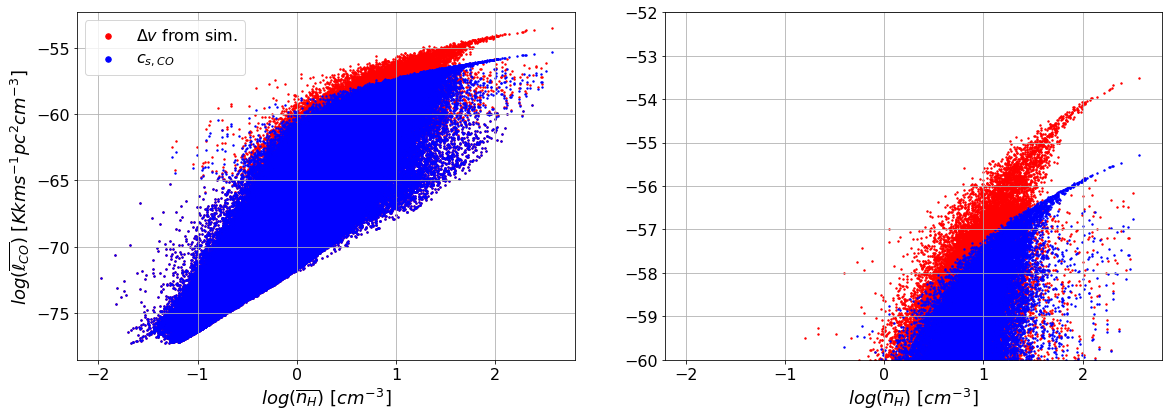

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
ax1.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_1), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax1.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_2), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_1), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_2), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax1.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
ax1.set_ylabel('$log(\overline{\ell_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax2.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
# ax2.set_ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax1.grid(b=True, which='both', axis='both') 
ax2.grid(b=True, which='both', axis='both')
# ax2.set_xlim([1.20,2.75])
ax2.set_ylim([-60, -52])
# plt.setp(ax2.get_yticklabels(), visible=True)
legend = ax1.legend(loc="upper left")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
plt.subplots_adjust(wspace=0.18)
# fig.suptitle("LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
plt.savefig('outputs/for_thesis/log(n_H_mean)vslog(l_CO)-sim.png', 
            dpi=300, bbox_inches='tight')

/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/snapshot/__init__.py:1443: RuntimeWarning: Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.
  "Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.", RuntimeWarning)
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide
/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


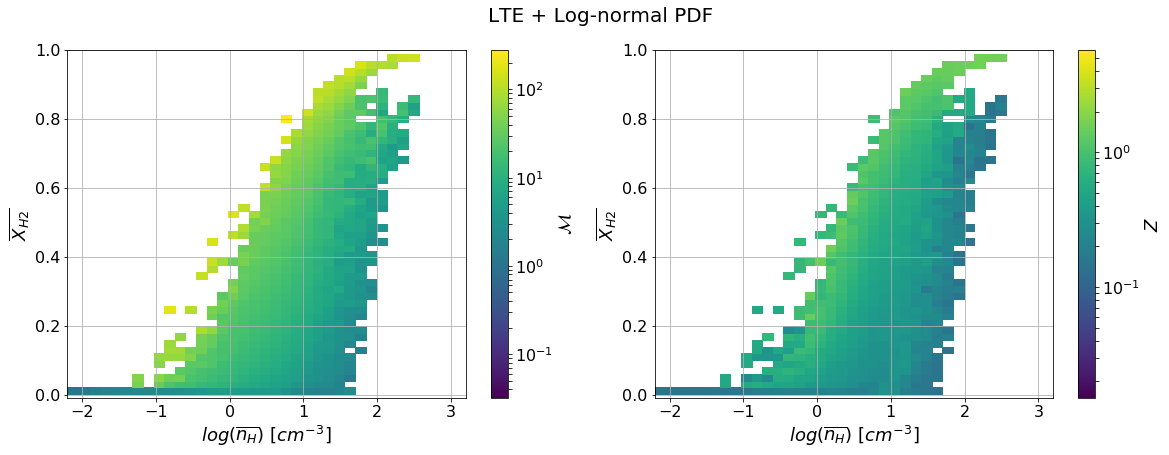

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_H,max_H],[min_n,max_n]])
yX_H2_M, xX_H2_M = yedges, xedges
im1 = ax1.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, 
               norm=LogNorm(), vmin=min_M, vmax=max_M, cmap='viridis')
ax1.set_ylim([-0.009,1.0])
ax1.set_xlim([-2.2, 3.2])
fig.colorbar(im1, ax=ax1, orientation='vertical', label='$\mathcal{M}$')
ax1.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax1.set_ylabel('$\overline{X_{H2}}$')
ax1.grid(b=True, which='both', axis='both')


histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=metal_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_H,max_H],[min_n,max_n]])

yX_H2_Z, xX_H2_Z = yedges, xedges
im2 = ax2.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, 
               norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="viridis")
fig.colorbar(im2, ax=ax2, orientation='vertical', label='$Z$')
ax2.set_ylim([-0.009,1.0])
ax2.set_xlim([-2.2, 3.2])
ax2.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax2.set_ylabel('$\overline{X_{H2}}$')
ax2.grid(b=True, which='both', axis='both')

plt.subplots_adjust(wspace=0.18)
fig.suptitle("LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
plt.savefig('outputs/debug_1.5/Hist-X_H2_bar-n_H_mean-MZ.png', 
            dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide


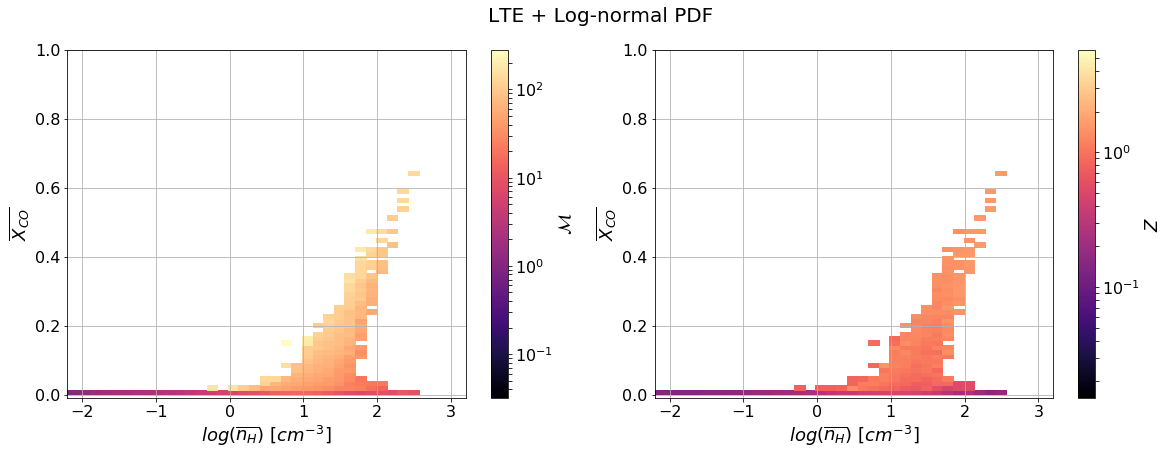

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_C,max_C],[min_n,max_n]])
yX_CO_M, xX_CO_M = yedges, xedges
im1 = ax1.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, 
               norm=LogNorm(), vmin=min_M, vmax=max_M, cmap="magma")
ax1.set_ylim([-0.009,1.0])
ax1.set_xlim([-2.2, 3.2])
fig.colorbar(im1, ax=ax1, orientation='vertical', label='$\mathcal{M}$')
ax1.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax1.set_ylabel('$\overline{X_{CO}}$')
ax1.grid(b=True, which='both', axis='both')


histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=metal_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_C,max_C],[min_n,max_n]])

yX_CO_Z, xX_CO_Z = yedges, xedges
im2 = ax2.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, 
               norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="magma")
fig.colorbar(im2, ax=ax2, orientation='vertical', label='$Z$')
ax2.set_ylim([-0.009,1.0])
ax2.set_xlim([-2.2, 3.2])
ax2.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax2.set_ylabel('$\overline{X_{CO}}$')
ax2.grid(b=True, which='both', axis='both')

plt.subplots_adjust(wspace=0.18)
fig.suptitle("LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
plt.savefig('outputs/debug_1.5/Hist-X_CO_bar-n_H_mean-MZ.png', 
            dpi=300, bbox_inches='tight')
plt.show()


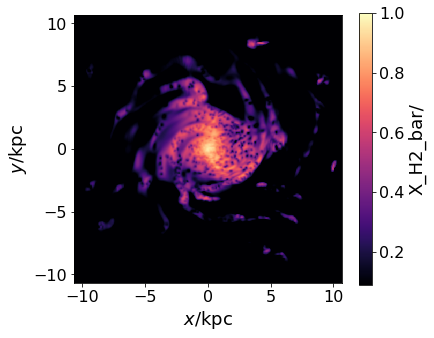

In [28]:
#for map of X_H2_bar
fig, ax = plt.subplots(figsize=(6,5))
map_of_X_H2_bar = pynbody.plot.image(region.g, qty="X_H2_bar", width = r_e*1.4,
                   log=False, resolution=500, cmap="magma", av_z="rho", vmin=0.09, vmax=1)
plt.savefig('outputs/for_thesis/map_X_H2_bar.png', 
            dpi=300, bbox_inches='tight')

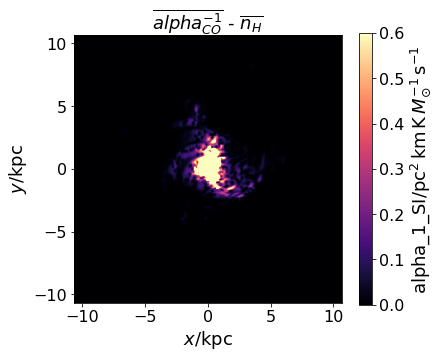

In [44]:
#for map of alpha_1_SI
fig, ax = plt.subplots(figsize=(6,5))
map_of_alpha_1 = pynbody.plot.image(region.g, qty="alpha_1_SI", width = r_e*1.4,
                   log=False, resolution=500, cmap="magma", av_z="rho", vmin=0.0, vmax=0.6)
plt.title("$\overline{alpha_{CO}^{-1}}\ $-$\ \overline{n_{H}}$")
plt.savefig('outputs/for_thesis/map_alpha_1_SI.png', 
            dpi=300, bbox_inches='tight')

In [30]:
psi = map_of_X_H2_bar/(map_of_alpha_1)

/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/array.py:337: RuntimeWarning: divide by zero encountered in divide
  return np.ndarray.__div__(self, rhs)
/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/array.py:337: RuntimeWarning: invalid value encountered in divide
  return np.ndarray.__div__(self, rhs)


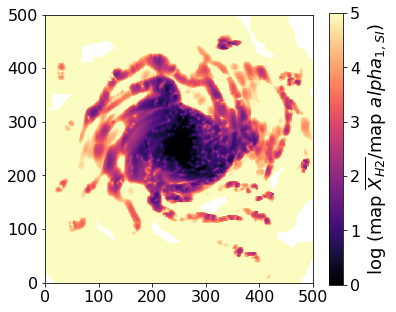

In [31]:
fig, ax = plt.subplots(figsize=(6,5))
plt.imshow(np.log10(psi), origin='lower', cmap="magma", vmin=0, vmax=5)
plt.colorbar(label="log (map $\overline{X_{H2}}$/map $alpha_{1, SI})$")
plt.savefig('outputs/for_thesis/map_psi.png', 
            dpi=300, bbox_inches='tight')

In [43]:
region.gas["n_H_mean_arr"] = n_H_mean_arr
region.gas["X_CO_bar"] = X_CO_bar
region.gas["X_H2_bar"] = X_H2_bar

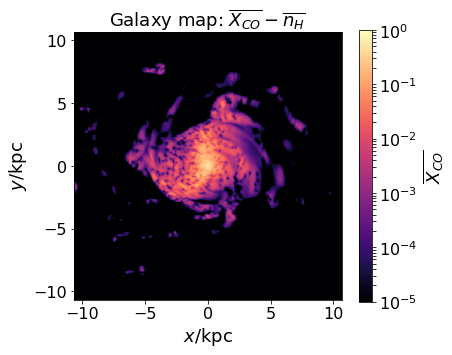

In [101]:
fig, ax = plt.subplots(figsize=(6,5))
with pynbody.analysis.angmom.faceon(region):
    pynbody.plot.image(region.g, qty="X_CO_bar", width = r_e*1.4, show_cbar=False,
                       log=True, resolution=500, cmap="magma", av_z="n_H_mean_arr", 
                       vmin=1e-5, vmax=1e0)
plt.colorbar(label=r"$\overline{X_{CO}}$")
plt.title(r"Galaxy map: $\overline{X_{CO}}-\overline{n_H}$")
plt.savefig('outputs/for_thesis/MAP-X_CO_bar_n_H_mean.png', 
            dpi=300, bbox_inches='tight')

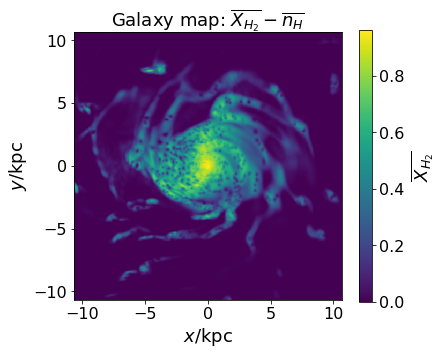

In [100]:
fig, ax = plt.subplots(figsize=(6,5))
with pynbody.analysis.angmom.faceon(region):
    pynbody.plot.image(region.g, qty="X_H2_bar", width = r_e*1.4, show_cbar=False,
                       log=False, resolution=500, cmap="viridis", av_z="n_H_mean_arr") 
    #                    vmin=1e-5, vmax=1e0)
plt.colorbar(label=r"$\overline{X_{H_2}}$")
plt.title(r"Galaxy map: $\overline{X_{H_2}}-\overline{n_H}$")
plt.savefig('outputs/for_thesis/MAP-X_H2_bar_n_H_mean.png', 
            dpi=300, bbox_inches='tight')

In [48]:
Y = alpha_1_SI
region.gas["Y"] = Y

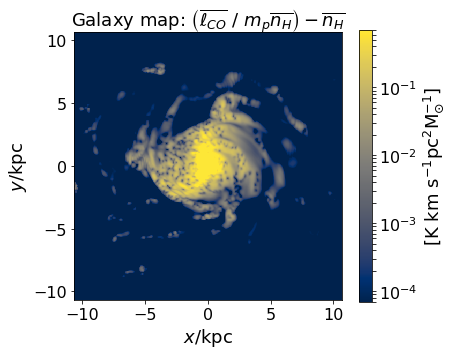

In [98]:
fig, ax = plt.subplots(figsize=(6,5))
with pynbody.analysis.angmom.faceon(region):
    pynbody.plot.image(region.g, qty="Y", width = r_e*1.4,
                   log=True, resolution=500, av_z="n_H_mean_arr", 
                       show_cbar=False, vmin=7e-5, vmax=7e-1, cmap="cividis")
# plt.imshow(np.log10(im3), origin='lower', cmap="cividis", )
plt.colorbar(label=r"$[\rm{K\ km\ s^{-1} pc^{2} M_{\odot}^{-1}}]$")
plt.title(r"Galaxy map: $\left(\overline{\ell_{CO}}\ /\ m_p \overline{n_H}\right)-\overline{n_H}$")
plt.savefig('outputs/for_thesis/MAP-Y_n_H_mean.png', 
            dpi=300, bbox_inches='tight')

In [96]:
Y

SimArray([0., 0., 0., ..., 0., 0., 0.], 'K km s**-1 pc**2 Msol**-1')

In [23]:
region.gas["alpha_1_SI"] = alpha_1_SI

In [41]:
np.min(alpha_1_SI)

SimArray(0., 'K km s**-1 pc**2 g**-1')

In [42]:
np.max(alpha_1_SI)

SimArray(12.34148608, 'K km s**-1 pc**2 g**-1')

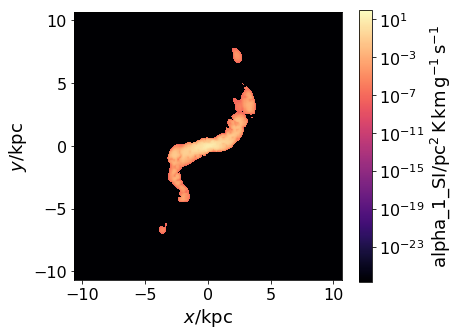

In [26]:
fig, ax = plt.subplots(figsize=(6,5))
pynbody.plot.image(region.g, qty="alpha_1_SI", width = r_e*1.4,
                   log=True, resolution=500, cmap="magma", vmax=1e2)
plt.show()

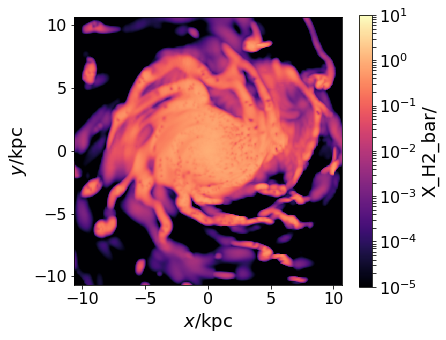

In [27]:
#mapping X_H2_bar with weight=rho
fig, ax = plt.subplots(figsize=(6,5))
X_H2_bar_proj = pynbody.plot.image(region.g, qty="X_H2_bar", width = r_e*1.4,
                   log=True, resolution=500, cmap="magma", av_z="n_H_mean_arr",
                   vmin=1e-5, vmax=1e1)

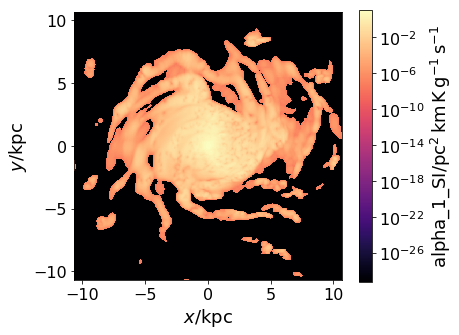

In [28]:
#mapping alpha_CO with weight=rho
fig, ax = plt.subplots(figsize=(6,5))
Y = pynbody.plot.image(region.g, qty="alpha_1_SI", width=r_e*1.4,
                   log=True, resolution=500, cmap="magma", av_z="n_H_mean_arr")


In [29]:
alpha_CO = X_H2_bar_proj*Y

In [44]:
alpha_CO.min()

SimArray(0., dtype=float32, 'pc**2 km K g**-1 s**-1')

In [45]:
alpha_CO.max()

SimArray(9.894043, dtype=float32, 'pc**2 km K g**-1 s**-1')

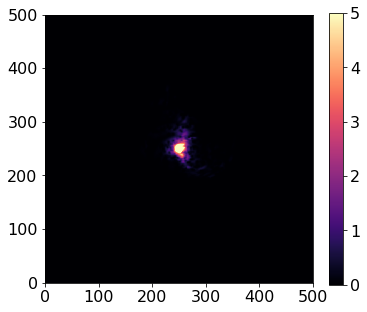

In [48]:
fig, ax = plt.subplots(figsize=(6,5))
plt.imshow(alpha_CO, origin='lower', cmap="magma", vmin=0, vmax=5)
plt.colorbar()

In [31]:
X_H2_bar_proj.max()

SimArray(0.9619783, dtype=float32, '1.00e+00')

In [32]:
X_H2_bar_proj.min()

SimArray(1.662175e-20, dtype=float32, '1.00e+00')

In [34]:
Y.min()

SimArray(6.1823803e-30, dtype=float32, 'pc**2 km K g**-1 s**-1')

In [35]:
Y.max()

SimArray(10.391892, dtype=float32, 'pc**2 km K g**-1 s**-1')